# Preparations

###  Modules Required

In [0]:
# !pip install numpy pandas geotext tweet-preprocessor nltk wordcloud plotly pycountry

### Mount Google Drive

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

### Import required modules

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

### Configurations

In [0]:
FIGURE_SIZE = (12,7)
FOLDER_LOCATION = '/content/drive/My Drive/Projects/Twitter Data Sentiment Analysis/data/'
# FOLDER_LOCATION = '/content/drive/My Drive/DM/'
# FOLDER_LOCATION = '../data/'
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
companies = ['google','tesla','apple','spacex','amazon','microsoft','facebook']

# Load Data

In [0]:
tweets_google = pd.read_csv(FOLDER_LOCATION + 'google.csv', index_col=0, converters={i: str for i in range(0, 8)})
tweets_tesla = pd.read_csv(FOLDER_LOCATION + 'tesla.csv', index_col=0, converters={i: str for i in range(0, 8)})
tweets_apple = pd.read_csv(FOLDER_LOCATION + 'apple.csv', index_col=0, converters={i: str for i in range(0, 8)})
tweets_spacex = pd.read_csv(FOLDER_LOCATION + 'spacex.csv', index_col=0, converters={i: str for i in range(0, 8)})
tweets_amazon = pd.read_csv(FOLDER_LOCATION + 'amazon.csv', index_col=0, converters={i: str for i in range(0, 8)})
tweets_microsoft = pd.read_csv(FOLDER_LOCATION + 'microsoft.csv', index_col=0, converters={i: str for i in range(0, 8)})
tweets_facebook = pd.read_csv(FOLDER_LOCATION + 'facebook.csv', index_col=0, converters={i: str for i in range(0, 8)})

# Tweets Collected

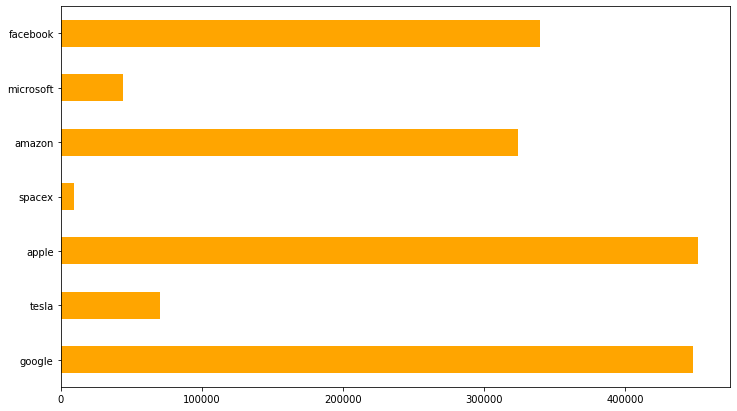

In [69]:
tweets_count = [tweets_google.shape[0], tweets_tesla.shape[0], tweets_apple.shape[0],
tweets_spacex.shape[0], tweets_amazon.shape[0], tweets_microsoft.shape[0], tweets_facebook.shape[0]]
pd.Series(tweets_count, index=companies).plot(kind='barh', figsize=FIGURE_SIZE, color='orange')
plt.show()

In [71]:
sum(tweets_count)

1687379

Total **16,87,379** tweets were collected over a period of 33 days

# Analysis

In [0]:
def get_sentiment(text):
    return TextBlob(text).sentiment

In [0]:
def add_sentiment_to_df(target):
  sentiment = target['clean_text'].apply(lambda x: get_sentiment(x))
  target['polarity'] = sentiment.apply(lambda x: x[0])
  target['subjectivity'] = sentiment.apply(lambda x: x[1])

In [33]:
%%time
add_sentiment_to_df(tweets_google)
add_sentiment_to_df(tweets_tesla)
add_sentiment_to_df(tweets_apple)
add_sentiment_to_df(tweets_spacex)
add_sentiment_to_df(tweets_amazon)
add_sentiment_to_df(tweets_microsoft)
add_sentiment_to_df(tweets_facebook)

CPU times: user 15min 53s, sys: 7.7 s, total: 16min 1s
Wall time: 16min 1s


## Sentiment Comparision of Companies

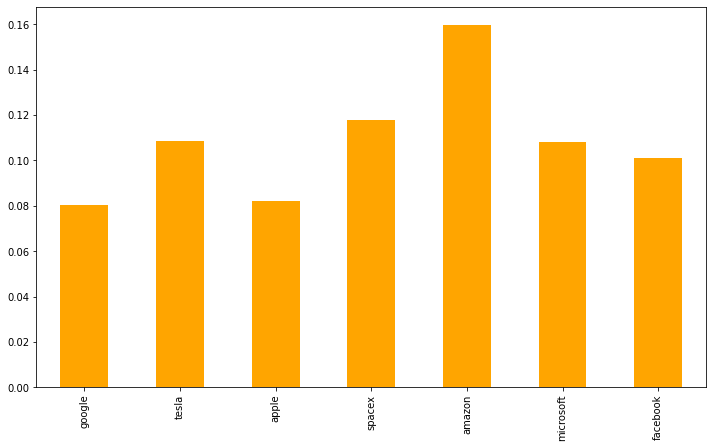

In [72]:
polarities = [tweets_google['polarity'].mean(),
tweets_tesla['polarity'].mean(),
tweets_apple['polarity'].mean(),
tweets_spacex['polarity'].mean(),
tweets_amazon['polarity'].mean(),
tweets_microsoft['polarity'].mean(),
tweets_facebook['polarity'].mean()]
pd.Series(polarities, index=companies).plot(kind='bar', figsize=FIGURE_SIZE, color='orange')
plt.show()

The above chart shows that people have most favorable opinion for amazon and least favorable for google and apple

## Top Twitter Clients

In [0]:
all_tweets = tweets_google.append(tweets_tesla).append(tweets_apple).append(tweets_spacex).append(tweets_amazon).append(tweets_microsoft).append(tweets_facebook)

In [0]:
client_popularity = all_tweets[['polarity','source_device']].groupby('source_device').size().sort_values(ascending=False)

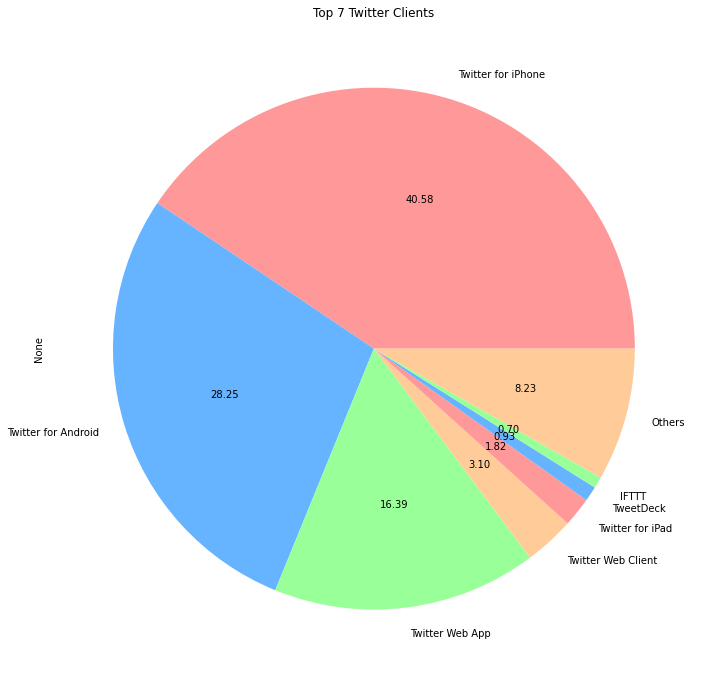

In [52]:
client_popularity[:7].append(pd.Series(client_popularity[7:].sum(), index=['Others']))\
.plot(kind='pie', autopct='%.2f', colors=colors, figsize=(12,12))
plt.title(f'Top 7 Twitter Clients')
plt.show()

This chart shows the most prefered twitter clients for people tweeting about this company.

## Average Sentiment of people using particular twitter clients

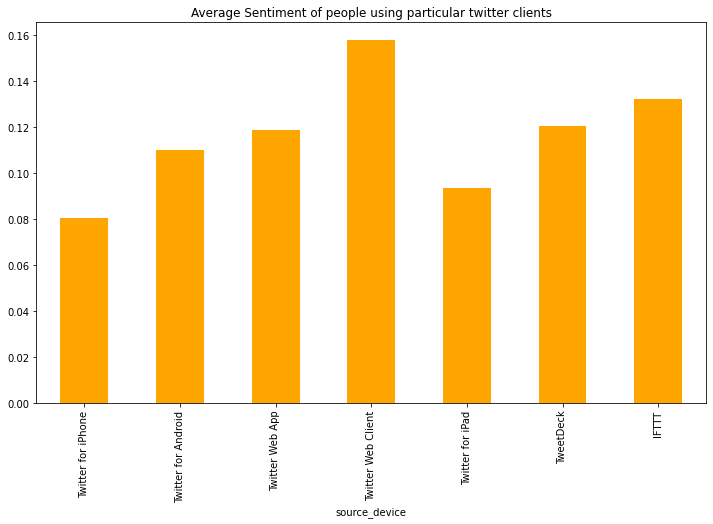

In [55]:
all_tweets[['polarity','source_device']].groupby('source_device').agg({
    'polarity': ['size', 'mean']
}).sort_values(('polarity','size'), ascending=False)[('polarity','mean')][:7]\
.plot(kind='bar', figsize=FIGURE_SIZE, color='orange')
plt.title(f'Average Sentiment of people using particular twitter clients')
plt.show()

## Most tweeting countries

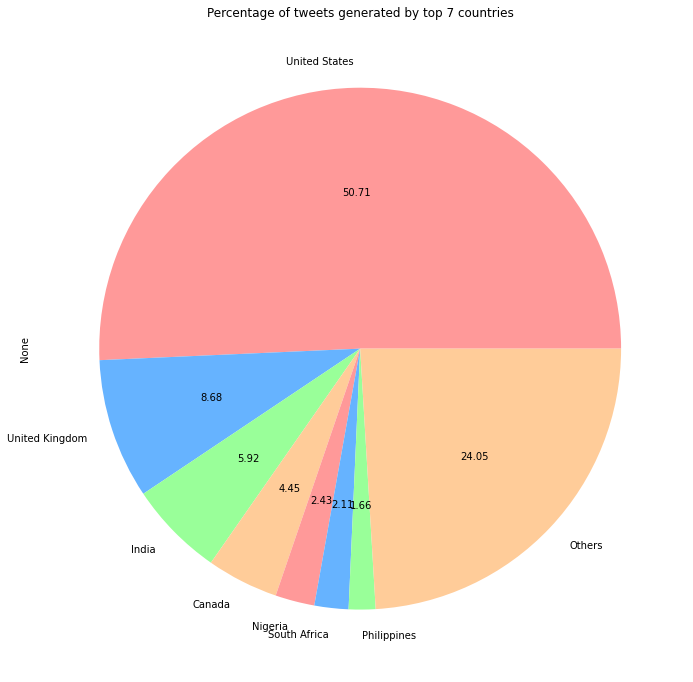

In [58]:
most_tweet_countries = all_tweets[['country','polarity']].groupby('country').agg({'polarity':['size','mean']}).sort_values(('polarity','size'), ascending=False)[('polarity','size')]
top_7_countries = most_tweet_countries[:7]
top_7_countries.index = top_7_countries.index.map(lambda x: pycountry.countries.get(alpha_2=x).name)
most_tweet_countries = top_7_countries.append(pd.Series(most_tweet_countries[7:].sum(), index=['Others']))
most_tweet_countries.plot(kind='pie', autopct='%.2f', colors=colors, figsize=(12,12))
plt.title('Percentage of tweets generated by top 7 countries')
plt.show()

## Sentiment of people in countries tweeting most

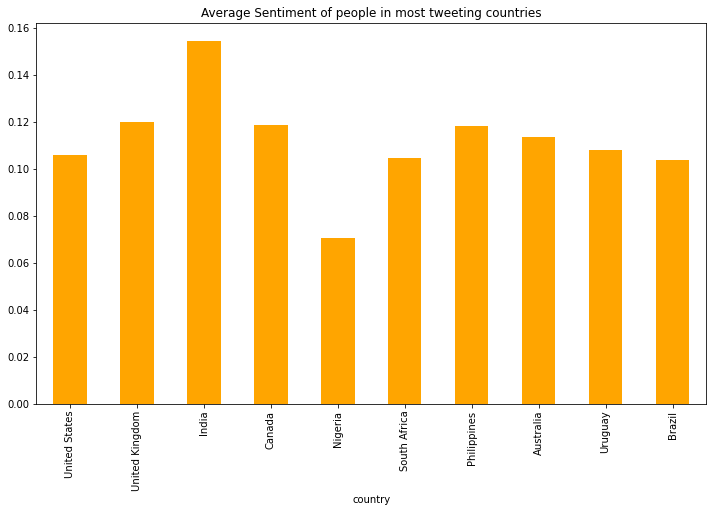

In [61]:
import pycountry
most_tweet_countries = all_tweets[['country','polarity']].groupby('country')\
.agg({'polarity':['size','mean']}).sort_values(('polarity','size'), ascending=False)[:10]
most_tweet_countries.index = most_tweet_countries.index.map(lambda x: pycountry.countries.get(alpha_2=x).name)
most_tweet_countries[('polarity','mean')].plot(kind='bar', figsize=FIGURE_SIZE, color='orange')
plt.title(f'Average Sentiment of people in most tweeting countries')
plt.show()

From the above bar chart, we can see that people in India are most positive and people in Nigeria the least.